# Train 16 class ko normalization
Kết quả ko chính xác bằng sử dụng pp normalize

In [1]:
import argparse
import pandas as pd
import numpy as np
import mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model
from keras.models import load_model

from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

from enum import Enum
import matplotlib.pyplot as plt
from keras.callbacks import Callback, ModelCheckpoint
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/thanhdat

In [2]:
raw_data = pd.read_csv('skeleton_data/train_16.csv', header=0) #train #skeleton_raw
dataset = raw_data.values
X = dataset[:, 0:20].astype(float)
Y = dataset[:, 20]
dataset.shape[0]

12800

In [7]:
print(X[0])

[0.53703704 0.19565217 0.51851852 0.34782609 0.44444444 0.32608696
 0.31481481 0.30434783 0.40740741 0.19565217 0.61111111 0.34782609
 0.64814815 0.5        0.59259259 0.60869565 0.46296296 0.65217391
 0.57407407 0.65217391]


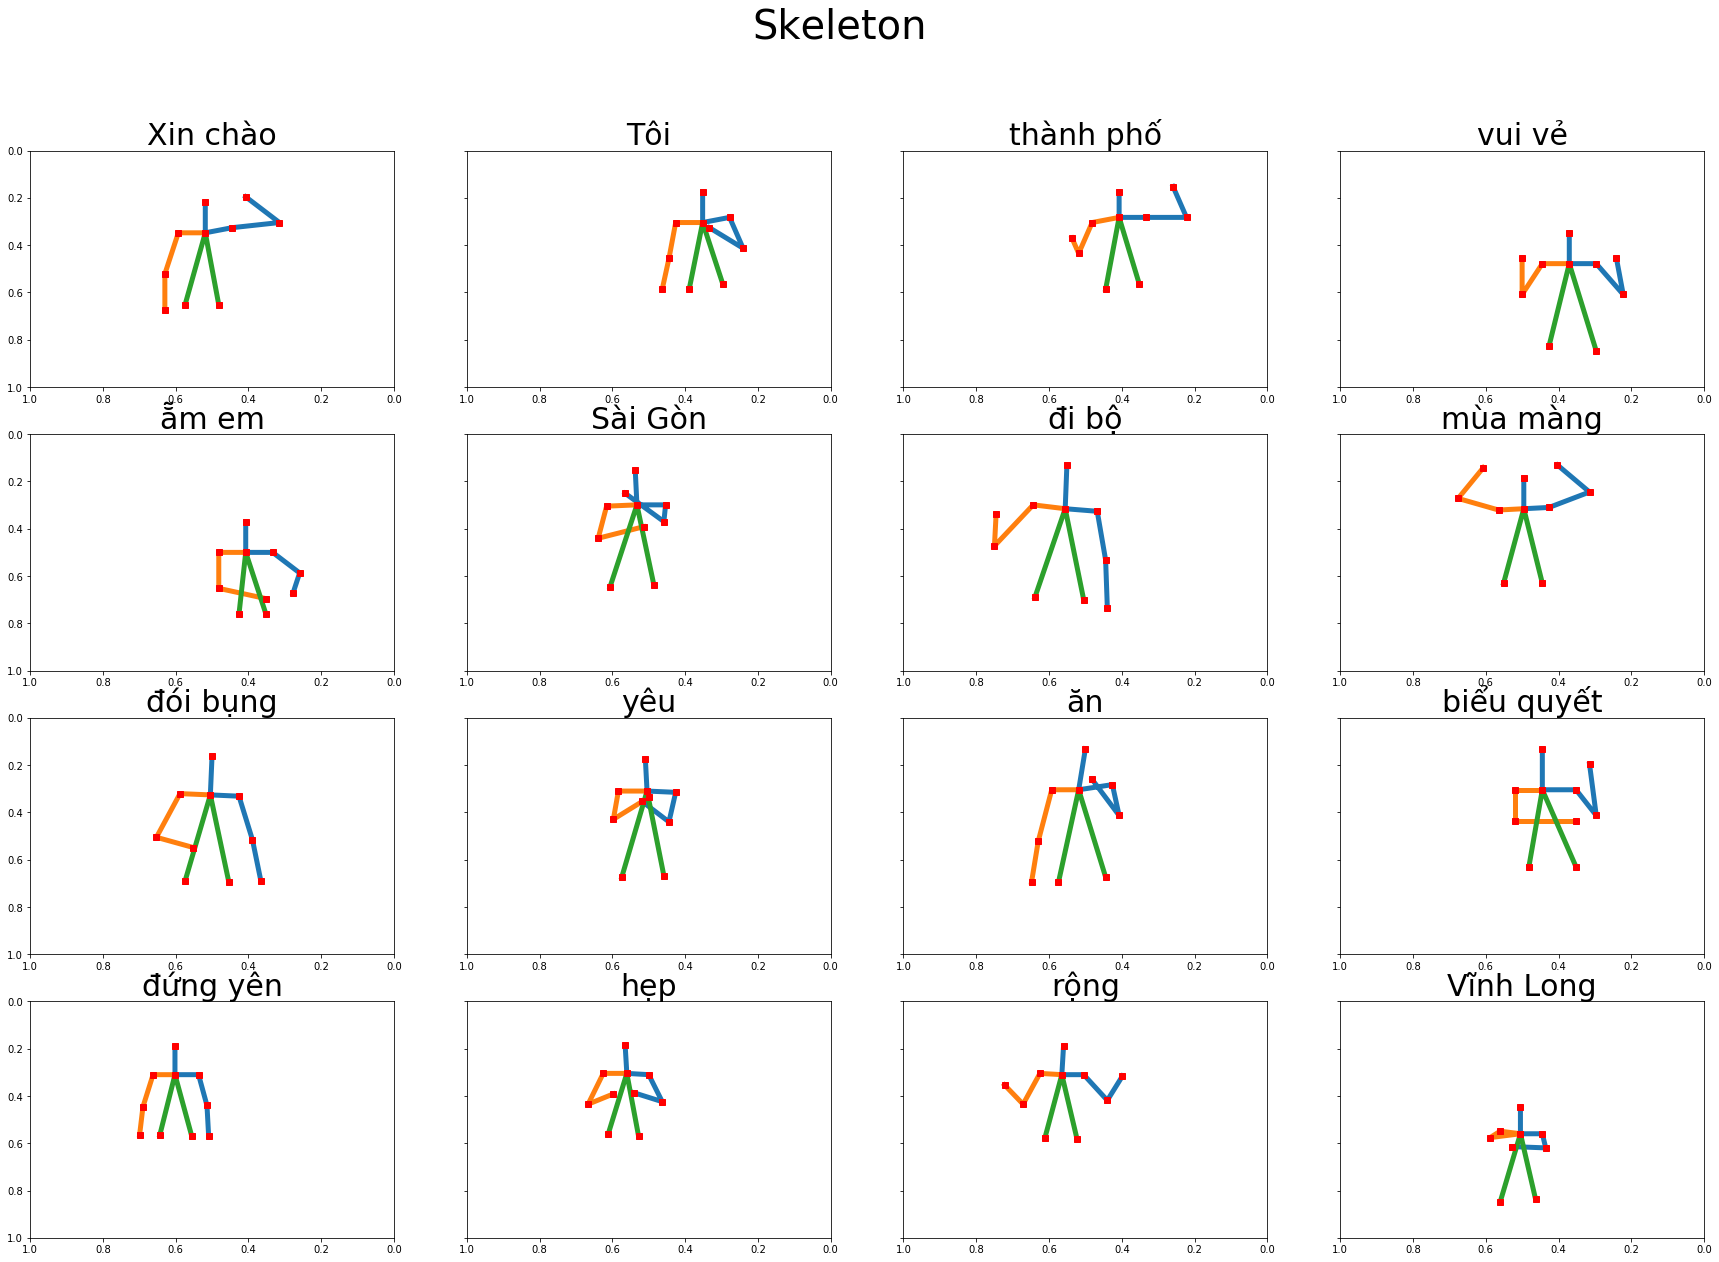

In [3]:
# Plot skeleton
df = pd.read_csv('skeleton_data/train_16.csv')
df.set_index('class', inplace=True)
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,20))
fig.suptitle('Skeleton', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(df.iloc[n*800+10])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

# encode label

In [10]:
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
matrix_Y = np_utils.to_categorical(encoder_Y)
print(X.shape)
print(Y.shape)
print(matrix_Y.shape)

(12800, 20)
(12800,)
(12800, 16)


In [5]:
print(Y[0], ": ", encoder_Y[0])
print(Y[800], ": ", encoder_Y[800])
print(Y[1600], ": ", encoder_Y[1600])
print(Y[2400], ": ", encoder_Y[2400])
print(Y[3200], ": ", encoder_Y[3200])
print(Y[4000], ": ", encoder_Y[4000])
print(Y[4800], ": ", encoder_Y[4800])
print(Y[5600], ": ", encoder_Y[5600])
print(Y[6400], ": ", encoder_Y[6400])
print(Y[7200], ": ", encoder_Y[7200])
print(Y[8000], ": ", encoder_Y[8000])
print(Y[8800], ": ", encoder_Y[8800])
print(Y[9600], ": ", encoder_Y[9600])
print(Y[10400], ": ", encoder_Y[10400])
print(Y[11200], ": ", encoder_Y[11200])
print(Y[12000], ": ", encoder_Y[12000])

0.0 :  0
1.0 :  1
2.0 :  2
3.0 :  3
4.0 :  4
5.0 :  5
6.0 :  6
7.0 :  7
8.0 :  8
9.0 :  9
10.0 :  10
11.0 :  11
12.0 :  12
13.0 :  13
14.0 :  14
15.0 :  15


# Train, test split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, matrix_Y, test_size=0.2)  #random_state=42

In [14]:
print(X_test[0].shape)

(20,)


# Build model

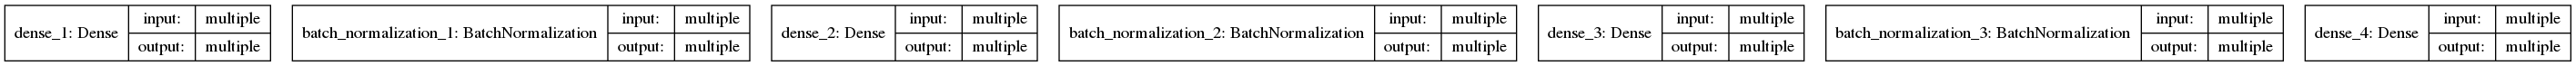

In [8]:
model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])
plot_model(model, to_file='model.png', show_shapes=True)

# Train

In [9]:
checkpoint = ModelCheckpoint('sign_language_16_test.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks = [checkpoint])
model.save('sign_language_16_konorm.h5')


Train on 10240 samples, validate on 2560 samples
Epoch 1/50
10240/10240 [==============================] - 1s 83us/step - loss: 1.6028 - acc: 0.5859 - val_loss: 2.5001 - val_acc: 0.2367

Epoch 00001: val_acc improved from -inf to 0.23672, saving model to sign_language_16_test.h5
Epoch 2/50
10240/10240 [==============================] - 1s 53us/step - loss: 0.6483 - acc: 0.9200 - val_loss: 0.7000 - val_acc: 0.9187

Epoch 00002: val_acc improved from 0.23672 to 0.91875, saving model to sign_language_16_test.h5
Epoch 3/50
10240/10240 [==============================] - 0s 42us/step - loss: 0.3864 - acc: 0.9638 - val_loss: 0.2376 - val_acc: 0.9852

Epoch 00003: val_acc improved from 0.91875 to 0.98516, saving model to sign_language_16_test.h5
Epoch 4/50
10240/10240 [==============================] - 0s 42us/step - loss: 0.2513 - acc: 0.9826 - val_loss: 0.1614 - val_acc: 0.9953

Epoch 00004: val_acc improved from 0.98516 to 0.99531, saving model to sign_language_16_test.h5
Epoch 5/50
10240/

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


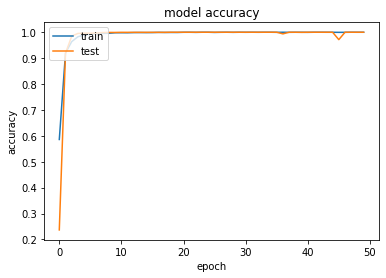

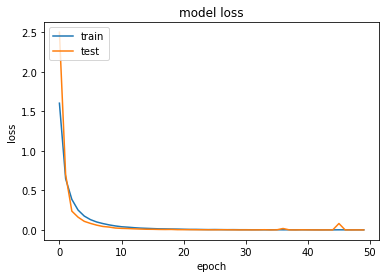

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluation

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize = 30)
    plt.yticks(tick_marks, classes, fontsize = 30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 25)
    plt.xlabel('Predicted label', fontsize = 25)

In [5]:
model = load_model('sign_language_16_konorm.h5')

In [22]:
Y_pred = model.predict(X_test)
print(X_test.shape)

(2560, 20)


In [31]:
print(X_test[:][0])
print(X_test[0])
test = np.array(X_test[0]).reshape(-1,20)
kq = np.argmax(model.predict(test))
print(kq)

[0.2962963  0.2173913  0.2962963  0.32608696 0.24074074 0.32608696
 0.16666667 0.43478261 0.14814815 0.32608696 0.37037037 0.32608696
 0.44444444 0.2173913  0.44444444 0.08695652 0.25925926 0.58695652
 0.33333333 0.58695652]
[0.2962963  0.2173913  0.2962963  0.32608696 0.24074074 0.32608696
 0.16666667 0.43478261 0.14814815 0.32608696 0.37037037 0.32608696
 0.44444444 0.2173913  0.44444444 0.08695652 0.25925926 0.58695652
 0.33333333 0.58695652]
2


In [15]:
print('X_test: ', X_test.shape)
print('Y_pred: ', Y_pred.shape)
print('Y_test: ', Y_test.shape)

X_test:  (2560, 20)
Y_pred:  (2560, 16)
Y_test:  (2560, 16)


In [17]:
cfm = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(Y_pred, axis=1))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[156   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 167   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 170   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 157   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 159   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 161   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 166   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 161   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 172   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 172   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 158   0   0]
 [  0   0   0   0   0 

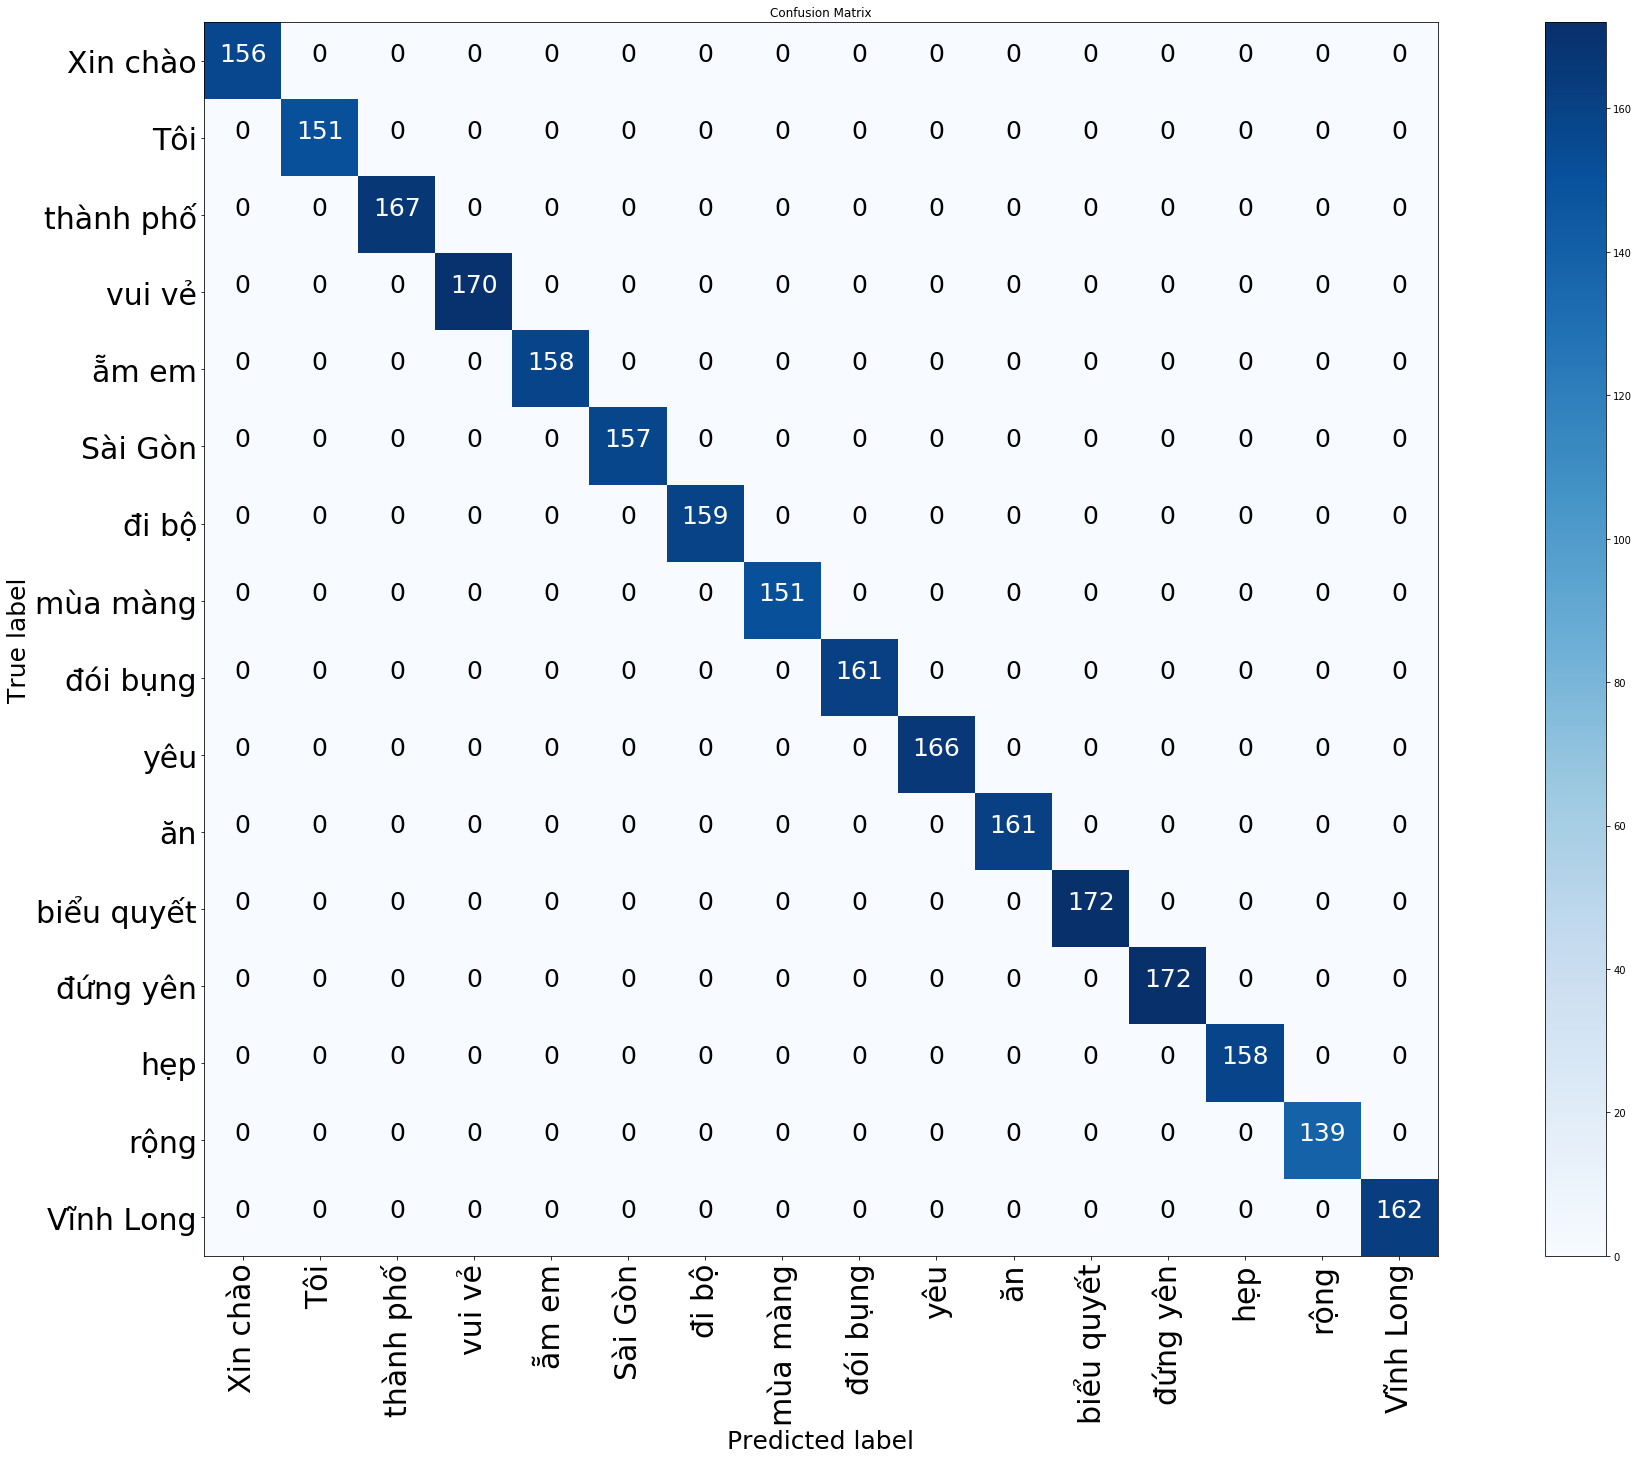

In [18]:
plt.figure(figsize=(30,20))
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']
plot_confusion_matrix(cfm, classes=class_names, title='Confusion Matrix')
plt.show()